### M.Aizaz Ud Din

## Agglomerative Clustering

### Library

In [34]:
import mglearn
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

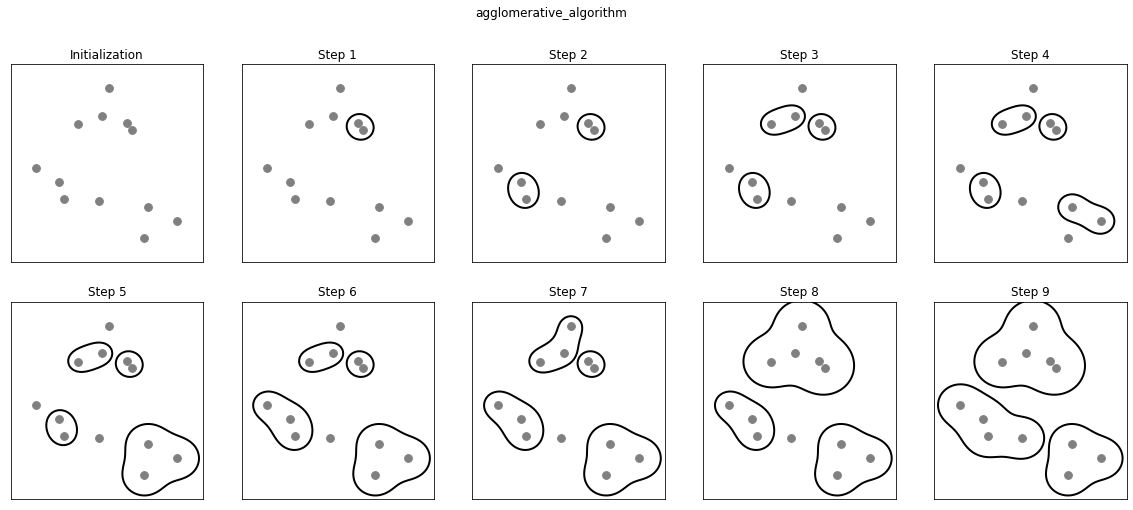

In [35]:
mglearn.plots.plot_agglomerative_algorithm()
plt.suptitle("agglomerative_algorithm");


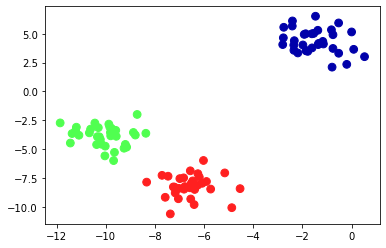

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=assignment, cmap=mglearn.cm3, s=60)

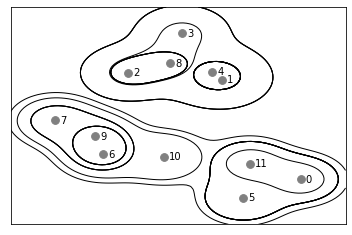

In [8]:
mglearn.plots.plot_agglomerative()

Text(0.5, 1.0, 'dendrogram')

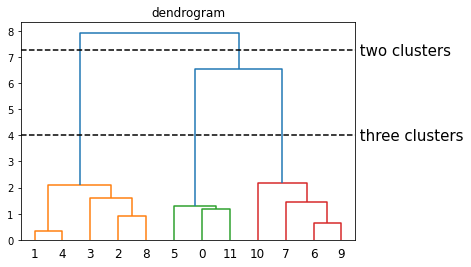

In [9]:
# import the dendrogram function and the ward clustering function from scipy
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# apply the ward clustering to the data array X
# The scipy ward function returns an array that specifies the distances bridged when performing agglomerative clustering
linkage_array = ward(X)
# now we plot the dendrogram for the linkage_array containing the distances between clusters
dendrogram(linkage_array);
# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', verticalalignment='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', verticalalignment='center', fontdict={'size': 15})
plt.title("dendrogram")


## DBSCAN

In [10]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
clusters
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
clusters


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

min_samples: 2 eps: 1.000000 cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000 cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000 cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000 cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000 cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000 cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000 cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000 cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000 cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000 cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000 cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000 cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


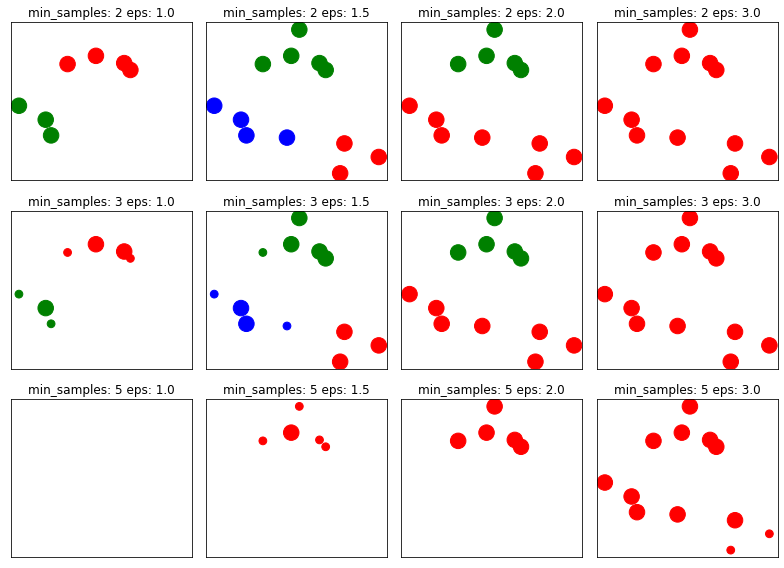

In [11]:
fig, axes = plt.subplots(3, 4, figsize=(11, 8), subplot_kw={'xticks': (), 'yticks': ()})
# Plot clusters as red, green and blue, and outliers (-1) as white
colors = np.array(['r', 'g', 'b', 'w'])

# iterate over settings of min_samples and eps
for i, min_samples in enumerate([2, 3, 5]):
    for j, eps in enumerate([1, 1.5, 2, 3]):
 # instantiate DBSCAN with a particular setting
         dbscan = DBSCAN(min_samples=min_samples, eps=eps)
 # get cluster assignments
         clusters = dbscan.fit_predict(X)
         print("min_samples: %d eps: %f cluster: %s" % (min_samples, eps, clusters))
# vizualize core samples and clusters.
         sizes = 60 * np.ones(X.shape[0])
 # size is given by whether something is a core sample
         sizes[dbscan.core_sample_indices_] *= 4
         axes[i, j].scatter(X[:, 0], X[:, 1], c=colors[clusters], s=sizes)
         axes[i, j].set_title("min_samples: %d eps: %.1f" % (min_samples, eps))
fig.tight_layout()


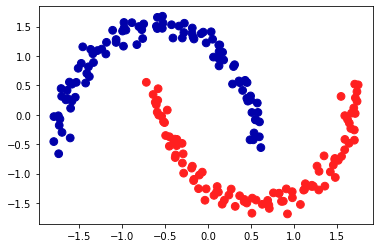

In [12]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)

## Evaluating clustering with ground truth

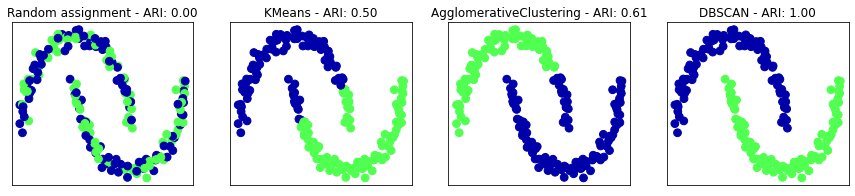

In [18]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})
# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
# create a random cluster assignment for reference:
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment:
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: %.2f" % adjusted_rand_score(y, random_clusters))
for ax, algorithm in zip(axes[1:], algorithms):
 # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("%s - ARI: %.2f" % (algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [19]:
from sklearn.metrics import accuracy_score
# These two labelings of points correspond to the same clustering:
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# accuracy is zero, as none of the labels are the same:
print("Accuracy: %.2f" % accuracy_score(clusters1, clusters2))
# adjusted rand score is 1, as the clustering is exactly the same:
print("ARI: %.2f" % adjusted_rand_score(clusters1, clusters2))


Accuracy: 0.00
ARI: 1.00


### Evaluating clustering without ground truth

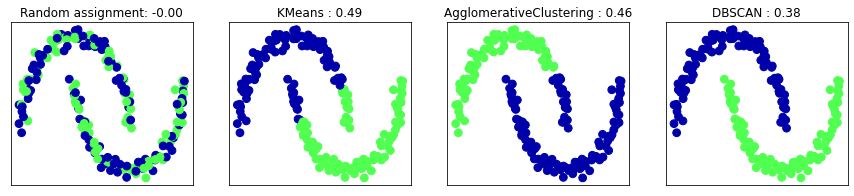

In [20]:
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})
# create a random cluster assignment for reference:
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment:
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: %.2f" % silhouette_score(X_scaled, random_clusters))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
 # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("%s : %.2f" % (algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

In [37]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_train, X_test, y_train, y_test = train_test_split( X_people, y_people, stratify=y_people, random_state=0)
pca = PCA(n_components=100, whiten=True)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)


C:\Users\Aizaz\AppData\Local\Temp/ipykernel_12148/2463189533.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [38]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
np.unique(labels)


array([-1], dtype=int64)

In [39]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
np.unique(labels)


array([-1], dtype=int64)

In [40]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
np.unique(labels)

array([-1,  0], dtype=int64)

In [41]:
np.bincount(labels + 1)


array([  29, 2034], dtype=int64)

In [ ]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [45]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps=%d" % eps)
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Number of clusters: %s" % np.unique(labels))
    print("Clusters: %s" % np.bincount(labels + 1))



eps=1
Number of clusters: [-1]
Clusters: [2063]

eps=3
Number of clusters: [-1]
Clusters: [2063]

eps=5
Number of clusters: [-1]
Clusters: [2063]

eps=7
Number of clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Clusters: [2000    3   14    5    3    3    4    3    4    3    4    3    3    5
    3    3]

eps=9
Number of clusters: [-1  0  1  2  3]
Clusters: [1300  753    4    3    3]

eps=11
Number of clusters: [-1  0]
Clusters: [ 413 1650]

eps=13
Number of clusters: [-1  0]
Clusters: [ 120 1943]


In [47]:
# dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)
for cluster in range(max(labels)):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(n_images * 1.5, 4))
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])


### Analyzing the faces dataset with k-Means

In [48]:
n_clusters = 10
# extract clusters with k-Means
km = KMeans(n_clusters=n_clusters, random_state=0)
labels_km = km.fit_predict(X_pca)
print("cluster sizes k-Means: %s" % np.bincount(labels_km))


cluster sizes k-Means: [106 261 177  67 144 332 245 156 289 286]


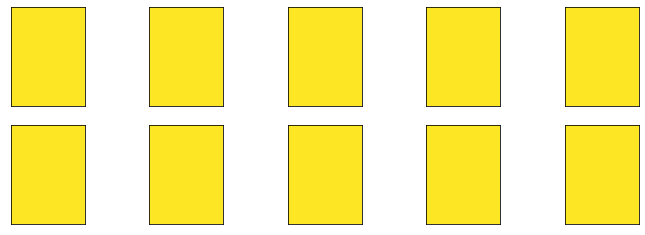

In [49]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

kmeans_face_clusters


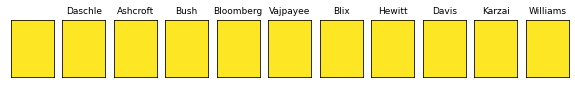

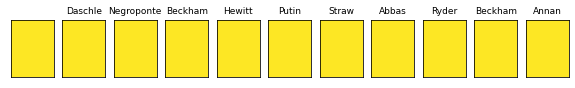

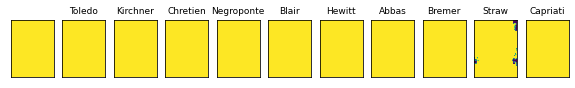

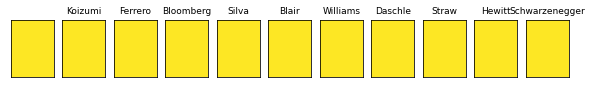

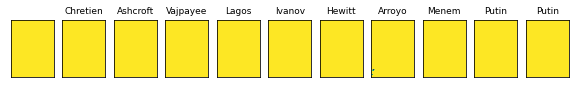

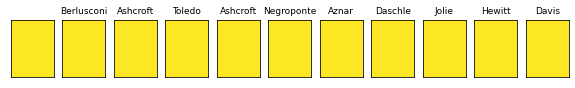

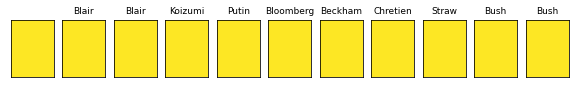

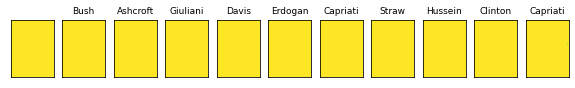

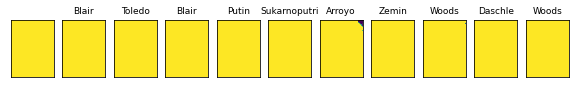

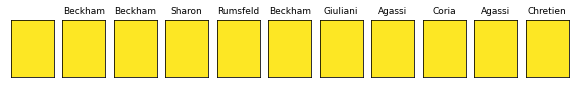

In [52]:
n_clusters = 10
for cluster in range(n_clusters):
    center = km.cluster_centers_[cluster]
    mask = km.labels_ == cluster
    dists = np.sum((X_pca - center) ** 2, axis=1)
    dists[~mask] = np.inf
    inds = np.argsort(dists)[:5]
    dists[~mask] = -np.inf
    inds = np.r_[inds, np.argsort(dists)[-5:]]
    fig, axes = plt.subplots(1, 11, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(10, 8))
    axes[0].imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)
    for image, label, asdf, ax in zip(X_people[inds], y_people[inds], labels_km[inds], axes[1:]):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title("%s" % (people.target_names[label].split()[-1]), fontdict={'fontsize': 9})
print("kmeans_face_clusters")

### Analyzing the faces dataset with agglomerative clustering

In [53]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: %s" % np.bincount(labels_agg))


cluster sizes agglomerative clustering: [180 279 198 432  37 116  20 155 234 412]


In [54]:
adjusted_rand_score(labels_agg, labels_km)


0.08250824489180084

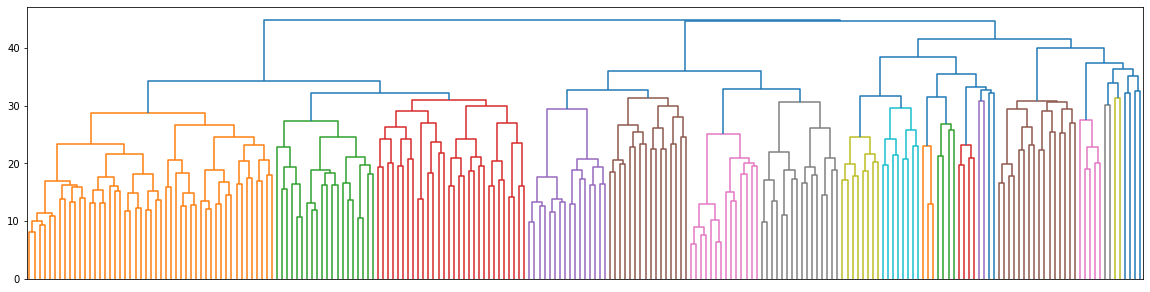

In [55]:
from scipy.cluster.hierarchy import dendrogram, ward
# apply the ward clustering to the data array X
# The scipy ward function returns an array that specifies the distances bridged
# when performing agglomerative clustering
linkage_array = ward(X_pca)
# now we plot the dendogram for the linkage_array containing the distances between clusters
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True);

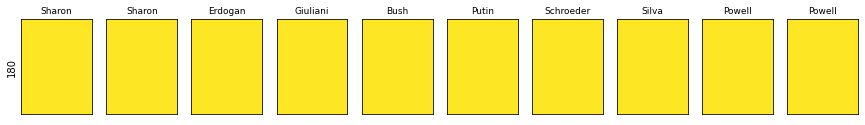

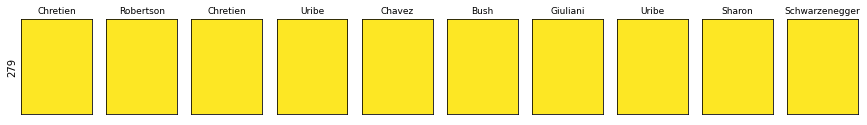

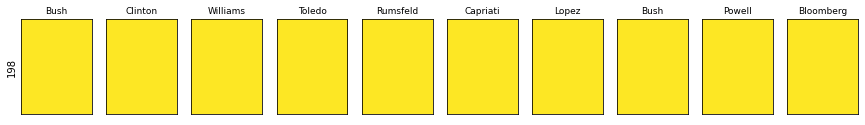

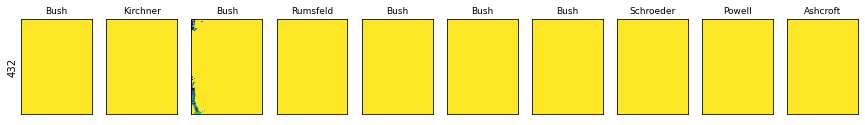

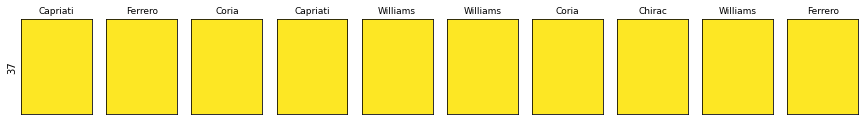

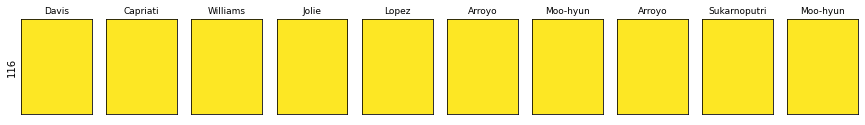

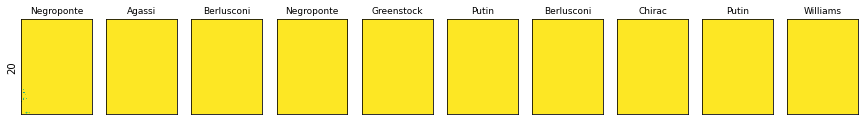

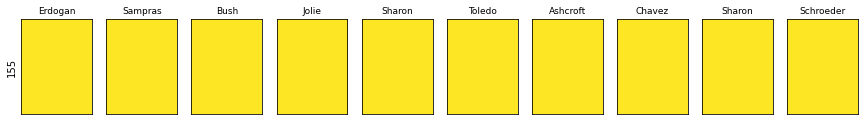

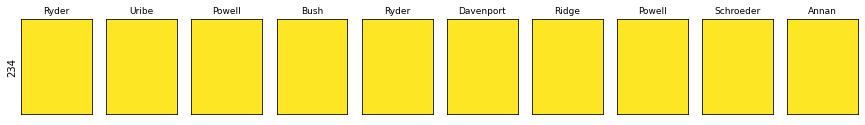

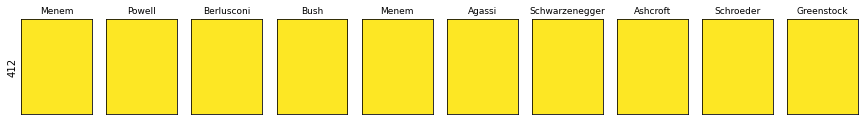

In [56]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title("%s" % people.target_names[label].split()[-1], fontdict={'fontsize': 9})


In [57]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: %s" % np.bincount(labels_agg))
n_clusters = 40

cluster sizes agglomerative clustering: [103  46  21  77  53  15  20 102   7  77  57  34  44  45  99  33  19  46
   6 258  29  41   3  99 105  25 157  20  26  12  58  17  13  30  11  19
  65  31  64  76]


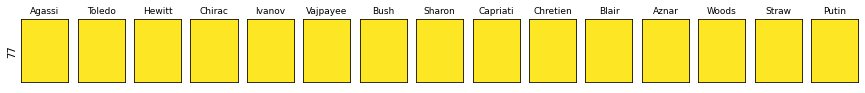

In [58]:
mask = labels_agg == cluster
fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
cluster_size = np.sum(mask)
axes[0].set_ylabel(cluster_size)
for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title("%s" % (people.target_names[label].split()[-1]), fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)
